In [9]:
import pandas as pd
import numpy as np

In [10]:
df_data_co2= pd.read_csv("/Users/jfk/Documents/DemoDay/DataCo2/Data_co2_emissions_across_JFK.csv")

In [11]:
def diagnostic_df(df):
    info_list = []
    for col in df.columns:
        data = df[col]
        info = {
            "colonne": col,
            "dtype": data.dtype,
            "nb_valeurs_uniques": data.nunique(dropna=True),
            "nb_valeurs_manquantes": data.isna().sum(),
            "%_valeurs_manquantes": round(data.isna().mean() * 100, 2),
            "exemple_valeur": data.dropna().iloc[0] if data.dropna().shape[0] > 0 else None,
        }
        if np.issubdtype(data.dtype, np.number):
            info.update({
                "min": round(data.min(), 2),
                "max": round(data.max(), 2),
                "moyenne": round(data.mean(), 2),
                "médiane": round(data.median(), 2)
            })
        else:
            info.update({"min": None, "max": None, "moyenne": None, "médiane": None})
        info_list.append(info)
    return pd.DataFrame(info_list).sort_values(by="%_valeurs_manquantes", ascending=False)

In [12]:
# Affichage les 5 premieres lignes du dataset
df_data_co2.head()

,Description,Name,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Country,Afghanistan,1850,AFG,3752993.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.436,0.629,NaN,NaN
1,Country,Afghanistan,1851,AFG,3767956.0,NaN,0.0,0.0,NaN,NaN,...,NaN,0.156,0.0,0.0,0.0,0.0,7.500,0.633,NaN,NaN
2,Country,Afghanistan,1852,AFG,3783940.0,NaN,0.0,0.0,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,7.560,0.637,NaN,NaN
3,Country,Afghanistan,1853,AFG,3800954.0,NaN,0.0,0.0,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,7.620,0.641,NaN,NaN
4,Country,Afghanistan,1854,AFG,3818038.0,NaN,0.0,0.0,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,7.678,0.644,NaN,NaN


In [13]:
# affiche les informnations sur les colonnes et le type de donnees

df_data_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43746 entries, 0 to 43745
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Description                                43746 non-null  object 
 1   Name                                       43746 non-null  object 
 2   year                                       43746 non-null  int64  
 3   iso_code                                   37921 non-null  object 
 4   population                                 37965 non-null  float64
 5   gdp                                        14989 non-null  float64
 6   cement_co2                                 23612 non-null  float64
 7   cement_co2_per_capita                      22715 non-null  float64
 8   co2                                        27059 non-null  float64
 9   co2_growth_abs                             24987 non-null  float64
 10  co2_growth_prct       

In [14]:
# Statistiques descriptives pour les colonnes numeriques

df_data_co2.describe()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,43746.000000,3.796500e+04,1.498900e+04,23612.000000,22715.000000,27059.000000,24987.000000,24668.000000,23585.000000,23285.000000,...,2108.000000,40828.000000,38060.000000,40828.000000,40828.000000,38060.000000,37410.000000,37236.000000,4535.000000,4535.000000
mean,1936.641727,5.739481e+07,3.351123e+11,9.495191,0.065905,446.602788,6.664167,44.661670,535.581202,7.214604,...,7.512655,2.278887,0.003026,0.007703,0.011070,0.000509,488.542225,316.133529,-7.232399,20.524440
std,50.243385,3.301779e+08,3.112988e+12,69.088018,0.125343,2015.844863,64.737394,1775.507928,2202.219657,99.347980,...,17.671054,9.333870,0.016519,0.043784,0.062028,0.003043,2392.579910,1839.602293,250.640012,52.744956
min,1850.000000,2.150000e+02,4.998000e+07,0.000000,0.000000,0.000000,-1977.750000,-100.000000,-99.693000,-2325.500000,...,0.000000,-0.810000,-0.001000,0.000000,-0.001000,0.000000,-14.961000,0.000000,-2195.952000,-98.849000
25%,1893.000000,3.324760e+05,7.955879e+09,0.000000,0.000000,0.487000,-0.011000,-1.280250,6.418000,-0.908000,...,0.204750,0.004000,0.000000,0.000000,0.000000,0.000000,1.835000,0.235000,-3.179500,-6.168000
50%,1937.000000,2.432030e+06,2.754978e+10,0.033000,0.006000,5.522000,0.051000,3.919500,27.691000,0.078000,...,0.838000,0.079000,0.000000,0.000000,0.000000,0.000000,15.007500,2.371000,1.518000,8.701000
75%,1980.000000,9.670886e+06,1.248960e+11,0.895250,0.090000,60.021000,1.131500,11.035750,123.959000,2.620000,...,3.211000,0.364000,0.001000,0.001000,0.001000,0.000000,78.242750,29.337500,9.153500,32.666000
max,2023.000000,8.091735e+09,1.301130e+14,1696.308000,2.484000,37791.570000,1865.208000,180870.000000,41416.480000,2340.184000,...,100.000000,100.000000,0.422000,1.161000,1.668000,0.085000,53816.852000,44114.785000,1798.999000,568.635000


In [15]:
# Compter les valeurs nulles par colonne

print(df_data_co2.isnull().sum())


Description                        0
Name                               0
year                               0
iso_code                        5825
population                      5781
                               ...  
temperature_change_from_n2o     5686
total_ghg                       6336
total_ghg_excluding_lucf        6510
trade_co2                      39211
trade_co2_share                39211
Length: 80, dtype: int64


In [16]:
# Nombre de colonnes
print("Nombre de colonnes :", df_data_co2.shape[1])


Nombre de colonnes : 80


In [17]:
# Calculer le pourcentage de valeurs manquantes par colonne
missing_percent = df_data_co2.isnull().sum() / len(df_data_co2) * 100

# Afficher le résultat
print("=== Pourcentage de valeurs manquantes par colonne ===")
print(missing_percent)


=== Pourcentage de valeurs manquantes par colonne ===
Description                     0.000000
Name                            0.000000
year                            0.000000
iso_code                       13.315503
population                     13.214923
                                 ...    
temperature_change_from_n2o    12.997760
total_ghg                      14.483610
total_ghg_excluding_lucf       14.881361
trade_co2                      89.633338
trade_co2_share                89.633338
Length: 80, dtype: float64


In [22]:
# Liste des colonnes qu'on veut garder
colonnes_a_garder = ['Name', 'year','iso_code','population','gdp','co2','co2_growth_abs','co2_growth_prct','co2_per_capita','co2_per_gdp','coal_co2','gas_co2','oil_co2','temperature_change_from_co2']  

# Sélectionner uniquement ces colonnes
df_new_data_co2 = df_data_co2[colonnes_a_garder]



In [24]:
df_new_data_co2.head(10)

,Name,year,iso_code,population,gdp,co2,co2_growth_abs,co2_growth_prct,co2_per_capita,co2_per_gdp,coal_co2,gas_co2,oil_co2,temperature_change_from_co2
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,Afghanistan,1855,AFG,3835192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,Afghanistan,1856,AFG,3852417.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,Afghanistan,1857,AFG,3869714.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,Afghanistan,1858,AFG,3887081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,Afghanistan,1859,AFG,3904521.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [25]:
# Calculer le pourcentage de valeurs manquantes par colonne
missing_percent = df_new_data_co2.isnull().sum() / len(df_new_data_co2) * 100

# Afficher le résultat
print("=== Pourcentage de valeurs manquantes par colonne ===")
print(missing_percent)


=== Pourcentage de valeurs manquantes par colonne ===
Name                            0.000000
year                            0.000000
iso_code                       13.315503
population                     13.214923
gdp                            65.736296
co2                            38.145202
co2_growth_abs                 42.881635
co2_growth_prct                43.610844
co2_per_capita                 43.153660
co2_per_gdp                    61.164449
coal_co2                       53.431171
gas_co2                        62.206830
oil_co2                        45.741325
temperature_change_from_co2     6.670324
dtype: float64


In [26]:
# Sauvegarder le DataFrame en CSV
df_new_data_co2.to_csv('/Users/jfk/Documents/DemoDay/new_data_co2_.csv', index=False)

print("Le fichier CSV a été créé avec succès !")


Le fichier CSV a été créé avec succès !


In [27]:
# 1️⃣ Vérifier les valeurs manquantes
print("=== Valeurs manquantes ===")
print(df_new_data_co2.isnull().sum())


print("===Pourcentage valeurs manquantes===")
print((df_new_data_co2.isnull().sum() / len(df_new_data_co2)) * 100)


=== Valeurs manquantes ===
Name                               0
year                               0
iso_code                        5825
population                      5781
gdp                            28757
co2                            16687
co2_growth_abs                 18759
co2_growth_prct                19078
co2_per_capita                 18878
co2_per_gdp                    26757
coal_co2                       23374
gas_co2                        27213
oil_co2                        20010
temperature_change_from_co2     2918
dtype: int64
===Pourcentage valeurs manquantes===
Name                            0.000000
year                            0.000000
iso_code                       13.315503
population                     13.214923
gdp                            65.736296
co2                            38.145202
co2_growth_abs                 42.881635
co2_growth_prct                43.610844
co2_per_capita                 43.153660
co2_per_gdp                    61.16

In [28]:
print(df_new_data_co2.dtypes)


Name                            object
year                             int64
iso_code                        object
population                     float64
gdp                            float64
co2                            float64
co2_growth_abs                 float64
co2_growth_prct                float64
co2_per_capita                 float64
co2_per_gdp                    float64
coal_co2                       float64
gas_co2                        float64
oil_co2                        float64
temperature_change_from_co2    float64
dtype: object


In [29]:
# Filtrer le ldataset pour ne garder que les annees superieures ou egales a 1960

df_filtered = df_new_data_co2[df_new_data_co2['year'] >= 1960]

In [30]:
df_filtered.head()

,Name,year,iso_code,population,gdp,co2,co2_growth_abs,co2_growth_prct,co2_per_capita,co2_per_gdp,coal_co2,gas_co2,oil_co2,temperature_change_from_co2
110,Afghanistan,1960,AFG,9035048.0,1.303325e+10,0.414,0.029,7.623,0.046,0.032,0.127,0.0,0.269,0.0
111,Afghanistan,1961,AFG,9214082.0,1.314629e+10,0.491,0.077,18.583,0.053,0.037,0.176,0.0,0.293,0.0
112,Afghanistan,1962,AFG,9404411.0,1.336763e+10,0.689,0.198,40.301,0.073,0.052,0.297,0.0,0.363,0.0
113,Afghanistan,1963,AFG,9604491.0,1.363030e+10,0.707,0.018,2.635,0.074,0.052,0.264,0.0,0.392,0.0
114,Afghanistan,1964,AFG,9814318.0,1.387050e+10,0.839,0.132,18.651,0.085,0.060,0.300,0.0,0.476,0.0


In [31]:
#affiche le nombre de lignes et de colonnes

print("Dimensions de df_filtered (lignes, colonnes) :", df_filtered.shape)


Dimensions de df_filtered (lignes, colonnes) : (16141, 14)


In [32]:
diagnostic_df(df_filtered)

,colonne,dtype,nb_valeurs_uniques,nb_valeurs_manquantes,%_valeurs_manquantes,exemple_valeur,min,max,moyenne,médiane
11,gas_co2,float64,5715,7912,49.02,0.0,0.00,7.922980e+03,1.561300e+02,5.930000e+00
4,gdp,float64,10007,6128,37.97,13033253888.0,70560000.00,1.301130e+14,4.624269e+11,3.901889e+10
10,coal_co2,float64,5971,6017,37.28,0.127,0.00,1.540122e+04,2.743000e+02,2.750000e+00
9,co2_per_gdp,float64,1448,5232,32.41,0.032,0.00,8.258000e+01,3.900000e-01,2.700000e-01
2,iso_code,object,218,2189,13.56,AFG,NaN,NaN,NaN,NaN
8,co2_per_capita,float64,7567,1856,11.50,0.046,0.00,3.764700e+02,5.320000e+00,2.400000e+00
12,oil_co2,float64,8597,1751,10.85,0.269,0.00,1.241197e+04,1.858200e+02,4.240000e+00
7,co2_growth_prct,float64,10230,1736,10.76,7.623,-100.00,4.331450e+03,6.460000e+00,2.790000e+00
6,co2_growth_abs,float64,6738,1678,10.40,0.029,-1977.75,1.865210e+03,8.610000e+00,5.000000e-02
3,population,float64,14667,1421,8.80,9035048.0,501.00,8.091735e+09,1.022671e+08,4.908770e+06


In [33]:
# 1️⃣ Vérifier les valeurs manquantes
print("=== Valeurs manquantes ===")
print(df_filtered.isnull().sum())


print("===Pourcentage valeurs manquantes===")
print((df_filtered.isnull().sum() / len(df_filtered)) * 100)

=== Valeurs manquantes ===
Name                              0
year                              0
iso_code                       2189
population                     1421
gdp                            6128
co2                             969
co2_growth_abs                 1678
co2_growth_prct                1736
co2_per_capita                 1856
co2_per_gdp                    5232
coal_co2                       6017
gas_co2                        7912
oil_co2                        1751
temperature_change_from_co2    1037
dtype: int64
===Pourcentage valeurs manquantes===
Name                            0.000000
year                            0.000000
iso_code                       13.561737
population                      8.803668
gdp                            37.965430
co2                             6.003346
co2_growth_abs                 10.395886
co2_growth_prct                10.755220
co2_per_capita                 11.498668
co2_per_gdp                    32.414349
coal_co2 

In [34]:
# Nombre de valeurs manquantes par colonne
missing_original = df_new_data_co2.isnull().sum()
missing_filtered = df_filtered.isnull().sum()

# Différence des valeurs manquantes
missing_diff = missing_original - missing_filtered

# Affichage
diff_df = pd.DataFrame({
    'Original_missing': missing_original,
    'Filtered_missing': missing_filtered,
    'Difference': missing_diff
})

print("=== Différence des valeurs manquantes entre les deux datasets ===")
print(diff_df)


=== Différence des valeurs manquantes entre les deux datasets ===
                             Original_missing  Filtered_missing  Difference
Name                                        0                 0           0
year                                        0                 0           0
iso_code                                 5825              2189        3636
population                               5781              1421        4360
gdp                                     28757              6128       22629
co2                                     16687               969       15718
co2_growth_abs                          18759              1678       17081
co2_growth_prct                         19078              1736       17342
co2_per_capita                          18878              1856       17022
co2_per_gdp                             26757              5232       21525
coal_co2                                23374              6017       17357
gas_co2               

In [35]:
# Nombre de pays différents
nombre_pays = df_filtered['Name'].nunique()
print("Nombre de pays différents :", nombre_pays)


Nombre de pays différents : 253


In [36]:
# Nombre de valeurs manquantes par ligne
missing_per_row = df_filtered.isnull().sum(axis=1)
print(missing_per_row)

110       0
111       0
112       0
113       0
114       0
         ..
43741    12
43742    12
43743    12
43744    12
43745    12
Length: 16141, dtype: int64


In [37]:
df_filtered.to_csv('/Users/jfk/Documents/DemoDay/df_filtered.csv', index=False)

print("Le fichier CSV a été créé avec succès !")


Le fichier CSV a été créé avec succès !


/var/folders/3y/ctpn4sds6d9_s21r19mtchzw0000gp/T/ipykernel_59435/331321076.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


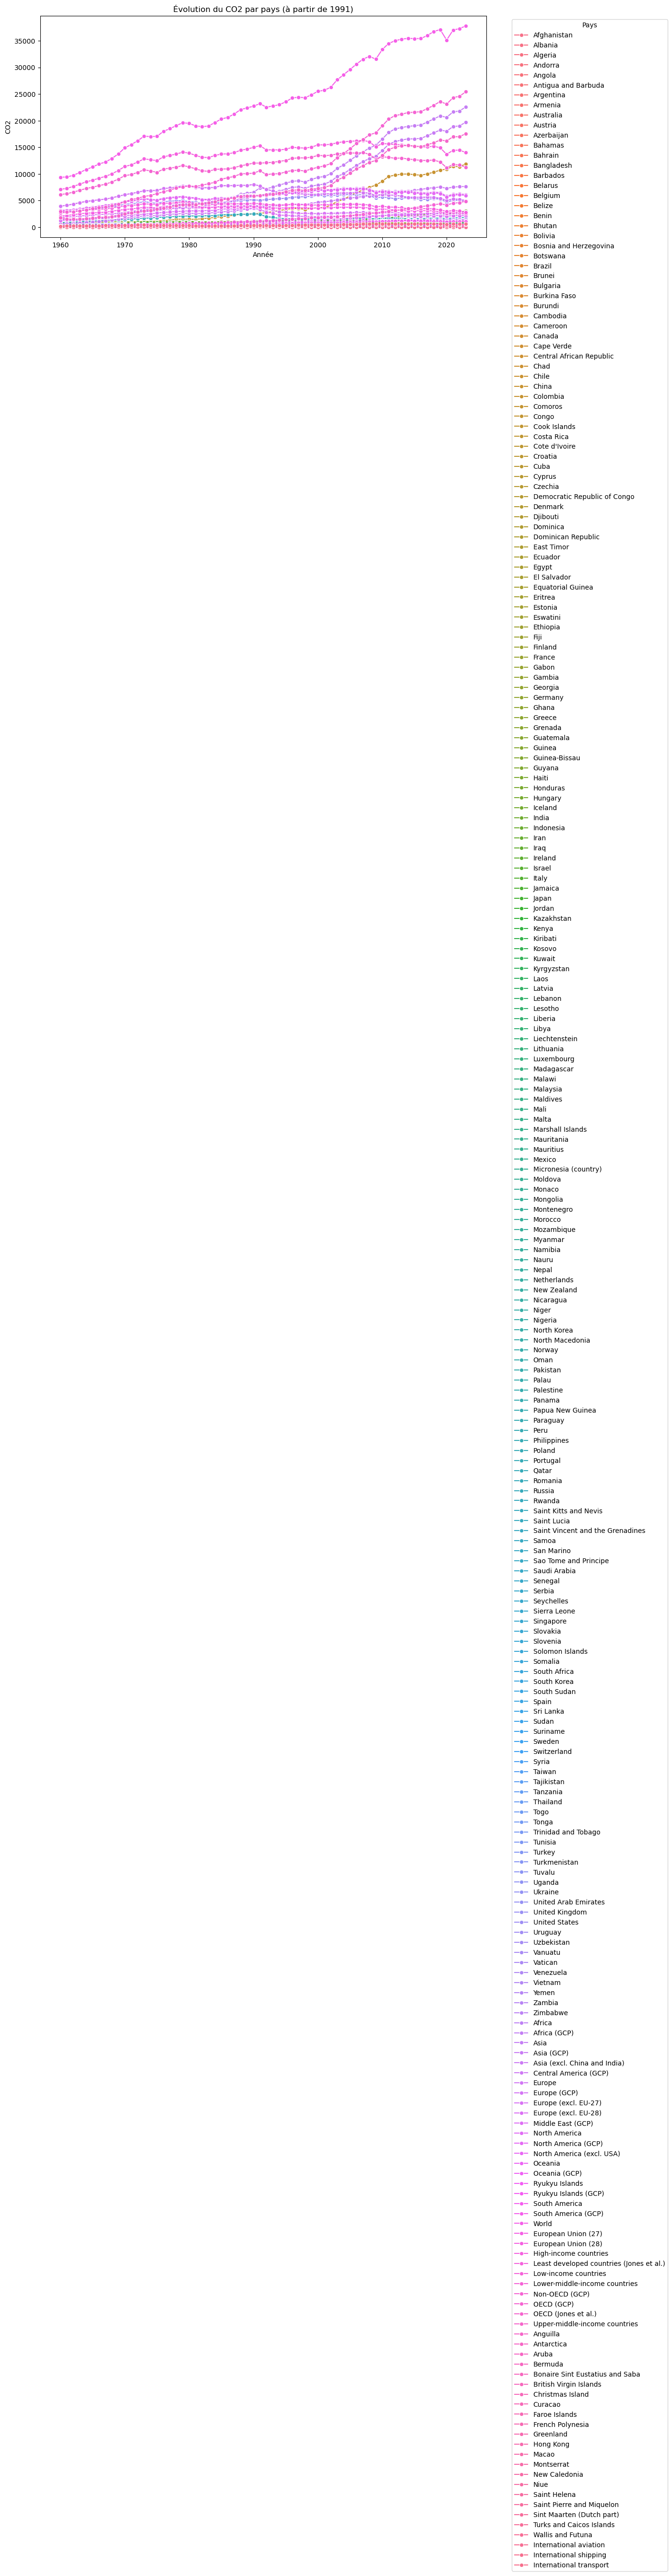

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Taille de la figure
plt.figure(figsize=(12, 6))

# Tracer la courbe CO2 par année pour chaque pays
sns.lineplot(data=df_filtered, x='year', y='co2', hue='Name', marker='o')

# Personnalisation du graphique
plt.title("Évolution du CO2 par pays (à partir de 1991)")
plt.xlabel("Année")
plt.ylabel("CO2")
plt.legend(title="Pays", bbox_to_anchor=(1.05, 1), loc='upper left')  # légende à droite
plt.tight_layout()

# Affichage
plt.show()


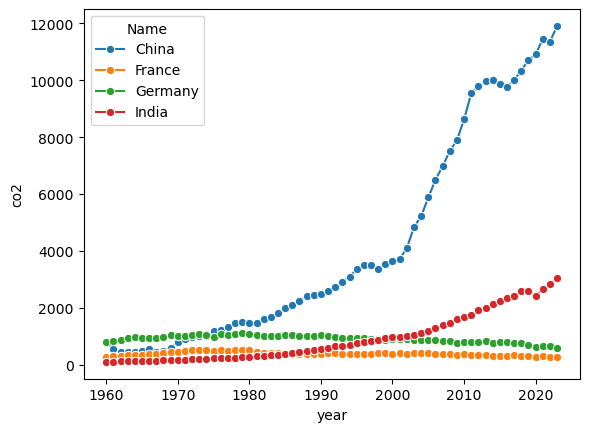

In [41]:
pays_selection = ['France', 'Germany', 'China', 'USA', 'India']
df_subset = df_filtered[df_filtered['Name'].isin(pays_selection)]

sns.lineplot(data=df_subset, x='year', y='co2', hue='Name', marker='o')
plt.show()


In [42]:
# Compter les valeurs manquantes par ligne
missing_per_row = df_filtered.isnull().sum(axis=1)

# Afficher les 10 premières lignes
print(missing_per_row.head(25))


110    0
111    0
112    0
113    0
114    0
115    0
116    0
117    0
118    0
119    0
120    0
121    0
122    0
123    0
124    0
125    0
126    0
127    0
128    0
129    0
130    0
131    0
132    0
133    0
134    0
dtype: int64


In [43]:
# Nombre de NaN par ligne
df_filtered['missing_count'] = df_filtered.isnull().sum(axis=1)

# Somme des NaN par pays
missing_per_country = df_filtered.groupby('Name')['missing_count'].sum().reset_index()

# Renommer la colonne pour plus de clarté
missing_per_country = missing_per_country.rename(columns={'missing_count': 'total_missing'})

print(missing_per_country)


                  Name  total_missing
0          Afghanistan              2
1               Africa            129
2         Africa (GCP)            704
3              Albania              2
4              Algeria              3
..                 ...            ...
248  Wallis and Futuna            408
249              World            164
250              Yemen             99
251             Zambia             62
252           Zimbabwe             62

[253 rows x 2 columns]


/var/folders/3y/ctpn4sds6d9_s21r19mtchzw0000gp/T/ipykernel_59435/1206637543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['missing_count'] = df_filtered.isnull().sum(axis=1)


In [44]:
missing_per_country= missing_per_country.sort_values(by="total_missing",ascending=False)

In [45]:
with pd.option_context("display.max_rows", None):
    print(missing_per_country)

                                         Name  total_missing
172                                OECD (GCP)            704
165                            Non-OECD (GCP)            704
2                                Africa (GCP)            704
214                       South America (GCP)            704
146                         Middle East (GCP)            704
75                               Europe (GCP)            704
191                            Ryukyu Islands            704
175                             Oceania (GCP)            704
173                       OECD (Jones et al.)            704
44                      Central America (GCP)            704
124  Least developed countries (Jones et al.)            704
14                                 Asia (GCP)            704
167                       North America (GCP)            704
148                                    Monaco            640
199                                San Marino            640
245                     

In [46]:
df_filtered

,Name,year,iso_code,population,gdp,co2,co2_growth_abs,co2_growth_prct,co2_per_capita,co2_per_gdp,coal_co2,gas_co2,oil_co2,temperature_change_from_co2,missing_count
110,Afghanistan,1960,AFG,9035048.0,1.303325e+10,0.414,0.029,7.623,0.046,0.032,0.127,0.0,0.269,0.0,0
111,Afghanistan,1961,AFG,9214082.0,1.314629e+10,0.491,0.077,18.583,0.053,0.037,0.176,0.0,0.293,0.0,0
112,Afghanistan,1962,AFG,9404411.0,1.336763e+10,0.689,0.198,40.301,0.073,0.052,0.297,0.0,0.363,0.0,0
113,Afghanistan,1963,AFG,9604491.0,1.363030e+10,0.707,0.018,2.635,0.074,0.052,0.264,0.0,0.392,0.0,0
114,Afghanistan,1964,AFG,9814318.0,1.387050e+10,0.839,0.132,18.651,0.085,0.060,0.300,0.0,0.476,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43741,International transport,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
43742,International transport,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
43743,International transport,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
43744,International transport,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


In [48]:
# Supprimer les lignes où iso_code est NaN
df_filtered = df_filtered.dropna(subset=['iso_code'])

# Vérification
print(df_filtered.head())
print("Nombre de lignes après suppression :", len(df_filtered))


            Name  year iso_code  population           gdp    co2  \
110  Afghanistan  1960      AFG   9035048.0  1.303325e+10  0.414   
111  Afghanistan  1961      AFG   9214082.0  1.314629e+10  0.491   
112  Afghanistan  1962      AFG   9404411.0  1.336763e+10  0.689   
113  Afghanistan  1963      AFG   9604491.0  1.363030e+10  0.707   
114  Afghanistan  1964      AFG   9814318.0  1.387050e+10  0.839   

     co2_growth_abs  co2_growth_prct  co2_per_capita  co2_per_gdp  coal_co2  \
110           0.029            7.623           0.046        0.032     0.127   
111           0.077           18.583           0.053        0.037     0.176   
112           0.198           40.301           0.073        0.052     0.297   
113           0.018            2.635           0.074        0.052     0.264   
114           0.132           18.651           0.085        0.060     0.300   

     gas_co2  oil_co2  temperature_change_from_co2  missing_count  
110      0.0    0.269                          0

In [49]:
# Nombre de NaN par ligne
df_filtered['missing_count'] = df_filtered.isnull().sum(axis=1)

# Somme des NaN par pays
missing_per_country = df_filtered.groupby('Name')['missing_count'].sum().reset_index()

# Renommer la colonne pour plus de clarté
missing_per_country = missing_per_country.rename(columns={'missing_count': 'total_missing'})

print(missing_per_country)


                  Name  total_missing
0          Afghanistan              2
1              Albania              2
2              Algeria              3
3              Andorra            367
4               Angola             46
..                 ...            ...
213            Vietnam              2
214  Wallis and Futuna            408
215              Yemen             99
216             Zambia             62
217           Zimbabwe             62

[218 rows x 2 columns]


In [50]:
df_filtered

,Name,year,iso_code,population,gdp,co2,co2_growth_abs,co2_growth_prct,co2_per_capita,co2_per_gdp,coal_co2,gas_co2,oil_co2,temperature_change_from_co2,missing_count
110,Afghanistan,1960,AFG,9035048.0,1.303325e+10,0.414,0.029,7.623,0.046,0.032,0.127,0.0,0.269,0.0,0
111,Afghanistan,1961,AFG,9214082.0,1.314629e+10,0.491,0.077,18.583,0.053,0.037,0.176,0.0,0.293,0.0,0
112,Afghanistan,1962,AFG,9404411.0,1.336763e+10,0.689,0.198,40.301,0.073,0.052,0.297,0.0,0.363,0.0,0
113,Afghanistan,1963,AFG,9604491.0,1.363030e+10,0.707,0.018,2.635,0.074,0.052,0.264,0.0,0.392,0.0,0
114,Afghanistan,1964,AFG,9814318.0,1.387050e+10,0.839,0.132,18.651,0.085,0.060,0.300,0.0,0.476,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43359,Wallis and Futuna,2019,WLF,11711.0,NaN,0.026,0.000,0.000,2.190,NaN,NaN,NaN,0.026,0.0,4
43360,Wallis and Futuna,2020,WLF,11640.0,NaN,0.026,0.000,0.000,2.203,NaN,NaN,NaN,0.026,0.0,4
43361,Wallis and Futuna,2021,WLF,11590.0,NaN,0.029,0.004,14.286,2.529,NaN,NaN,NaN,0.029,0.0,4
43362,Wallis and Futuna,2022,WLF,11501.0,NaN,0.030,0.001,2.395,2.610,NaN,NaN,NaN,0.030,0.0,4


In [51]:
# Nombre de NaN par ligne
df_filtered['missing_count'] = df_filtered.isnull().sum(axis=1)

# Somme des NaN par pays
missing_per_country = df_filtered.groupby('Name')['missing_count'].sum().reset_index()

# Renommer la colonne pour plus de clarté
missing_per_country = missing_per_country.rename(columns={'missing_count': 'total_missing'})

print(missing_per_country)

                  Name  total_missing
0          Afghanistan              2
1              Albania              2
2              Algeria              3
3              Andorra            367
4               Angola             46
..                 ...            ...
213            Vietnam              2
214  Wallis and Futuna            408
215              Yemen             99
216             Zambia             62
217           Zimbabwe             62

[218 rows x 2 columns]


In [52]:
df_filtered


,Name,year,iso_code,population,gdp,co2,co2_growth_abs,co2_growth_prct,co2_per_capita,co2_per_gdp,coal_co2,gas_co2,oil_co2,temperature_change_from_co2,missing_count
110,Afghanistan,1960,AFG,9035048.0,1.303325e+10,0.414,0.029,7.623,0.046,0.032,0.127,0.0,0.269,0.0,0
111,Afghanistan,1961,AFG,9214082.0,1.314629e+10,0.491,0.077,18.583,0.053,0.037,0.176,0.0,0.293,0.0,0
112,Afghanistan,1962,AFG,9404411.0,1.336763e+10,0.689,0.198,40.301,0.073,0.052,0.297,0.0,0.363,0.0,0
113,Afghanistan,1963,AFG,9604491.0,1.363030e+10,0.707,0.018,2.635,0.074,0.052,0.264,0.0,0.392,0.0,0
114,Afghanistan,1964,AFG,9814318.0,1.387050e+10,0.839,0.132,18.651,0.085,0.060,0.300,0.0,0.476,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43359,Wallis and Futuna,2019,WLF,11711.0,NaN,0.026,0.000,0.000,2.190,NaN,NaN,NaN,0.026,0.0,4
43360,Wallis and Futuna,2020,WLF,11640.0,NaN,0.026,0.000,0.000,2.203,NaN,NaN,NaN,0.026,0.0,4
43361,Wallis and Futuna,2021,WLF,11590.0,NaN,0.029,0.004,14.286,2.529,NaN,NaN,NaN,0.029,0.0,4
43362,Wallis and Futuna,2022,WLF,11501.0,NaN,0.030,0.001,2.395,2.610,NaN,NaN,NaN,0.030,0.0,4


In [53]:
missing_count = df_filtered['iso_code'].isnull().sum()
print("Nombre de valeurs manquantes dans iso_code :", missing_count)


Nombre de valeurs manquantes dans iso_code : 0


In [54]:
# Nombre de pays différents
nombre_pays = df_filtered['Name'].nunique()
print("Nombre de pays différents :", nombre_pays)

Nombre de pays différents : 218


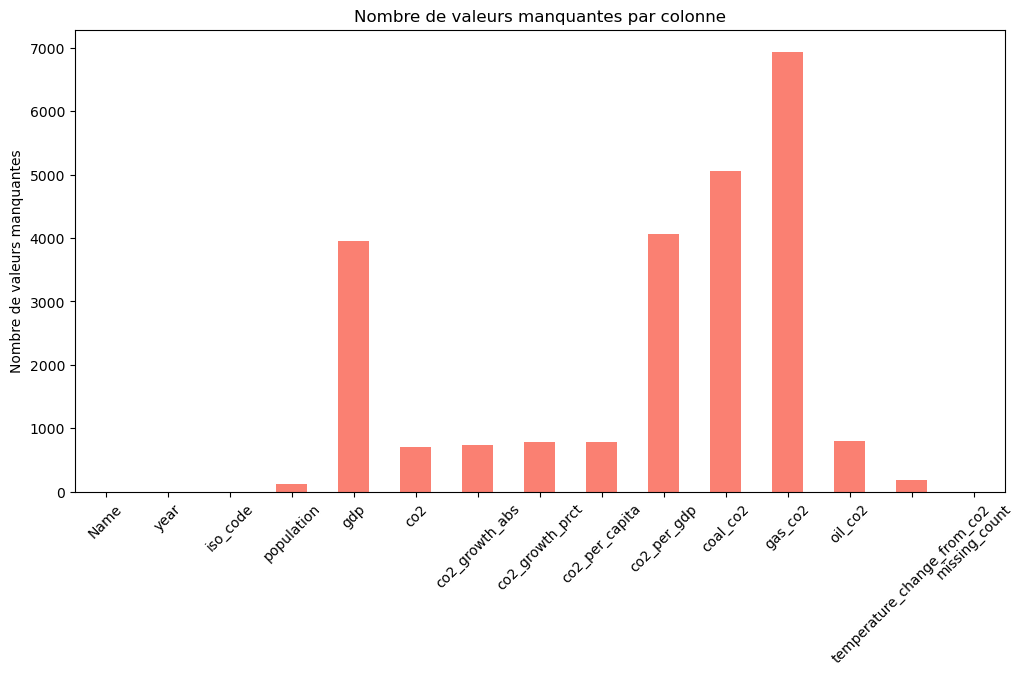

In [55]:
import matplotlib.pyplot as plt

# Compter les valeurs manquantes par colonne
missing_count = df_filtered.isnull().sum()

# Tracer un graphique en barres
plt.figure(figsize=(12,6))
missing_count.plot(kind='bar', color='salmon')
plt.title("Nombre de valeurs manquantes par colonne")
plt.ylabel("Nombre de valeurs manquantes")
plt.xticks(rotation=45)
plt.show()


In [56]:
df_filtered.to_csv('/Users/jfk/Documents/DemoDay/df_filtered2.csv', index=False)

print("Le fichier CSV a été créé avec succès !")

Le fichier CSV a été créé avec succès !


In [64]:
df_filtered2 =pd.read_csv("/Users/jfk/Documents/DemoDay/df_filtered2.csv")

In [66]:
df_filtered2.tail()


,Name,year,iso_code,population,gdp,co2,co2_growth_abs,co2_growth_prct,co2_per_capita,co2_per_gdp,coal_co2,gas_co2,oil_co2,temperature_change_from_co2,missing_count
13947,Wallis and Futuna,2019,WLF,11711.0,NaN,0.026,0.000,0.000,2.190,NaN,NaN,NaN,0.026,0.0,4
13948,Wallis and Futuna,2020,WLF,11640.0,NaN,0.026,0.000,0.000,2.203,NaN,NaN,NaN,0.026,0.0,4
13949,Wallis and Futuna,2021,WLF,11590.0,NaN,0.029,0.004,14.286,2.529,NaN,NaN,NaN,0.029,0.0,4
13950,Wallis and Futuna,2022,WLF,11501.0,NaN,0.030,0.001,2.395,2.610,NaN,NaN,NaN,0.030,0.0,4
13951,Wallis and Futuna,2023,WLF,11394.0,NaN,0.031,0.001,2.172,2.691,NaN,NaN,NaN,0.031,0.0,4



-----------------------------
Analyse des valeurs aberrantes pour : year
-----------------------------
Empty DataFrame
Columns: [year]
Index: []


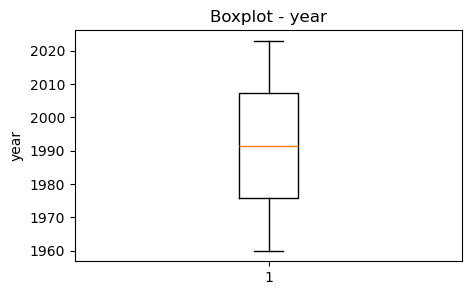


-----------------------------
Analyse des valeurs aberrantes pour : population
-----------------------------
       population
167    35688942.0
168    36743040.0
169    37856126.0
170    39068978.0
171    40000411.0
...           ...
34098  35111417.0
34099  36134868.0
34100  37140233.0
34101  38222880.0
34102  39390800.0

[1837 rows x 1 columns]


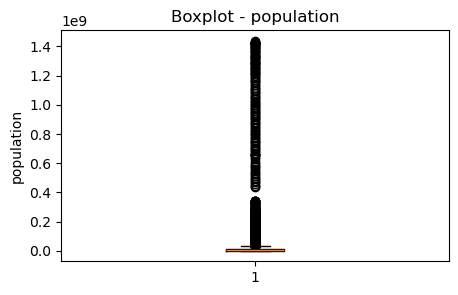


-----------------------------
Analyse des valeurs aberrantes pour : gdp
-----------------------------
                gdp
508    4.507060e+11
509    4.820290e+11
510    4.984180e+11
511    5.123730e+11
512    5.318440e+11
...             ...
33923  6.815010e+11
33924  7.316530e+11
33925  7.526300e+11
33926  7.719120e+11
33927  8.338040e+11

[1396 rows x 1 columns]


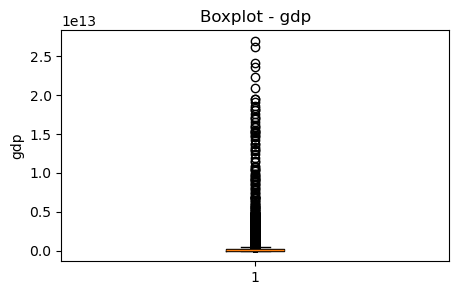


-----------------------------
Analyse des valeurs aberrantes pour : co2
-----------------------------
           co2
496    106.537
503    110.993
505    109.889
506    111.087
507    118.856
...        ...
33924  339.147
33925  362.460
33926  313.973
33927  297.634
33928  334.726

[1894 rows x 1 columns]


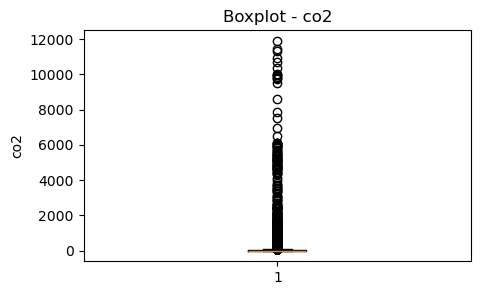


-----------------------------
Analyse des valeurs aberrantes pour : co2_growth_abs
-----------------------------
       co2_growth_abs
161             3.474
162            -1.803
304            -2.413
314            -3.466
316            -1.773
...               ...
41790           3.087
41794          -3.092
41799          -8.403
41801          -2.185
41802           2.339

[3426 rows x 1 columns]


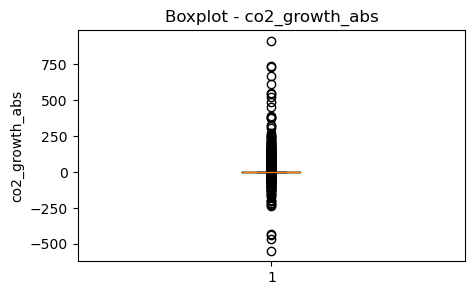


-----------------------------
Analyse des valeurs aberrantes pour : co2_growth_prct
-----------------------------
       co2_growth_prct
112             40.301
119            -23.064
120             77.469
122            -19.181
130            -21.339
...                ...
43003          -31.118
43004           27.572
43169           32.258
43348          -25.000
43349           33.333

[1419 rows x 1 columns]


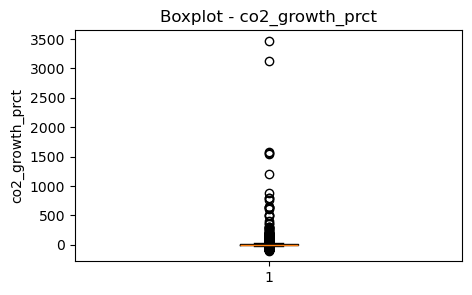


-----------------------------
Analyse des valeurs aberrantes pour : co2_per_capita
-----------------------------
       co2_per_capita
989            19.688
1532           16.242
1533           16.109
1534           16.213
1535           16.299
...               ...
43010          18.127
43011          17.336
43012          17.046
43014          16.474
43016          16.201

[749 rows x 1 columns]


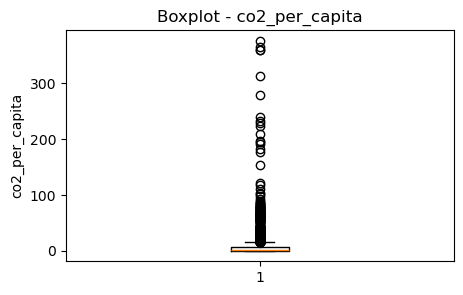


-----------------------------
Analyse des valeurs aberrantes pour : co2_per_gdp
-----------------------------
       co2_per_gdp
840          1.055
841          0.960
842          0.964
1863         0.939
1870         1.049
...            ...
33211        1.080
33212        1.035
33213        0.970
34047        1.035
34387        0.991

[729 rows x 1 columns]


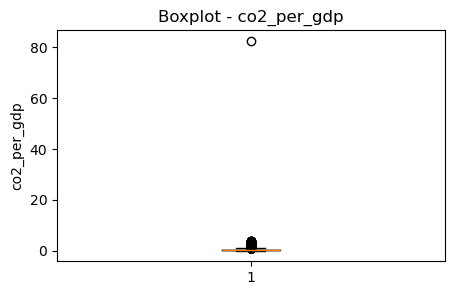


-----------------------------
Analyse des valeurs aberrantes pour : coal_co2
-----------------------------
       coal_co2
1502     58.928
1503     56.480
1504     57.571
1505     58.789
1506     61.802
...         ...
33924   191.443
33925   215.817
33926   172.395
33927   157.181
33928   192.077

[1488 rows x 1 columns]


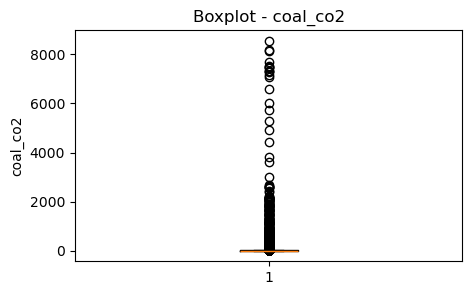


-----------------------------
Analyse des valeurs aberrantes pour : gas_co2
-----------------------------
       gas_co2
496     54.641
503     61.211
507     54.894
509     56.721
510     64.114
...        ...
33726   57.166
33727   64.122
33728   65.668
33729   54.667
33733   55.711

[1026 rows x 1 columns]


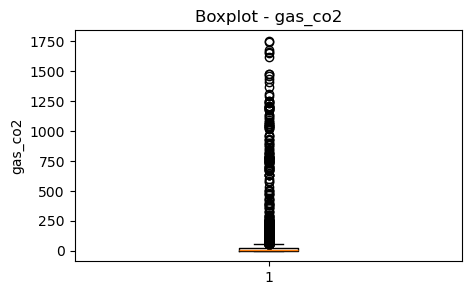


-----------------------------
Analyse des valeurs aberrantes pour : oil_co2
-----------------------------
       oil_co2
511     51.919
512     52.885
513     55.590
514     54.627
515     55.323
...        ...
33924   70.808
33925   68.389
33926   64.076
33927   67.727
33928   75.601

[1727 rows x 1 columns]


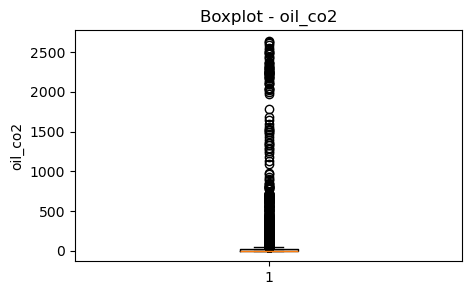


-----------------------------
Analyse des valeurs aberrantes pour : temperature_change_from_co2
-----------------------------
       temperature_change_from_co2
1165                         0.006
1166                         0.006
1167                         0.006
1168                         0.006
1169                         0.006
...                            ...
33924                        0.006
33925                        0.006
33926                        0.006
33927                        0.006
33928                        0.006

[1378 rows x 1 columns]


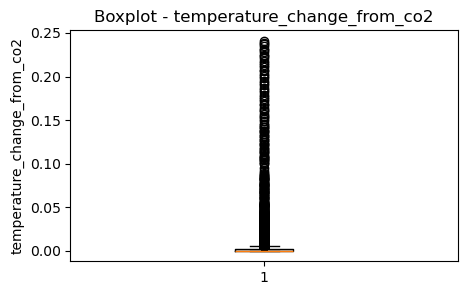

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

colonnes = [
    "year",
    "population",
    "gdp",
    "co2",
    "co2_growth_abs",
    "co2_growth_prct",
    "co2_per_capita",
    "co2_per_gdp",
    "coal_co2",
    "gas_co2",
    "oil_co2",
    "temperature_change_from_co2"
]

for col in colonnes:
    print("\n-----------------------------")
    print(f"Analyse des valeurs aberrantes pour : {col}")
    print("-----------------------------")
    
    # Calcul IQR
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1

    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR

    # Détection des valeurs aberrantes
    outliers = df_filtered[(df_filtered[col] < borne_inf) | (df_filtered[col] > borne_sup)]

    print(outliers[[col]])

    # Boxplot
    plt.figure(figsize=(5, 3))
    plt.boxplot(df_filtered[col].dropna())
    plt.title(f"Boxplot - {col}")
    plt.ylabel(col)
    plt.show()


In [67]:
# Filtrer le ldataset pour ne garder que les annees superieures ou egales a 2000

df_filtered3 = df_filtered2[df_filtered2['year'] >= 2000]

In [68]:
df_filtered3.to_csv('/Users/jfk/Documents/DemoDay/df_filtered3.csv', index=False)

print("Le fichier CSV a été créé avec succès !")

Le fichier CSV a été créé avec succès !


In [69]:
df_filtered3

,Name,year,iso_code,population,gdp,co2,co2_growth_abs,co2_growth_prct,co2_per_capita,co2_per_gdp,coal_co2,gas_co2,oil_co2,temperature_change_from_co2,missing_count
40,Afghanistan,2000,AFG,20130334.0,1.128379e+10,1.047,-0.045,-4.078,0.052,0.093,0.004,0.224,0.788,0.0,0
41,Afghanistan,2001,AFG,20284303.0,1.102127e+10,1.069,0.022,2.098,0.053,0.097,0.070,0.209,0.762,0.0,0
42,Afghanistan,2002,AFG,21378123.0,1.880487e+10,1.341,0.272,25.432,0.063,0.071,0.055,0.547,0.727,0.0,0
43,Afghanistan,2003,AFG,22733054.0,2.107434e+10,1.560,0.219,16.302,0.069,0.074,0.092,0.466,0.992,0.0,0
44,Afghanistan,2004,AFG,23560656.0,2.233257e+10,1.237,-0.322,-20.669,0.053,0.055,0.092,0.227,0.909,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13947,Wallis and Futuna,2019,WLF,11711.0,NaN,0.026,0.000,0.000,2.190,NaN,NaN,NaN,0.026,0.0,4
13948,Wallis and Futuna,2020,WLF,11640.0,NaN,0.026,0.000,0.000,2.203,NaN,NaN,NaN,0.026,0.0,4
13949,Wallis and Futuna,2021,WLF,11590.0,NaN,0.029,0.004,14.286,2.529,NaN,NaN,NaN,0.029,0.0,4
13950,Wallis and Futuna,2022,WLF,11501.0,NaN,0.030,0.001,2.395,2.610,NaN,NaN,NaN,0.030,0.0,4


In [70]:
df_filtered2 = df_filtered2.drop(columns=["population", "gdp"])


In [72]:
df_filtered2.head()

,Name,year,iso_code,co2,co2_growth_abs,co2_growth_prct,co2_per_capita,co2_per_gdp,coal_co2,gas_co2,oil_co2,temperature_change_from_co2,missing_count
0,Afghanistan,1960,AFG,0.414,0.029,7.623,0.046,0.032,0.127,0.0,0.269,0.0,0
1,Afghanistan,1961,AFG,0.491,0.077,18.583,0.053,0.037,0.176,0.0,0.293,0.0,0
2,Afghanistan,1962,AFG,0.689,0.198,40.301,0.073,0.052,0.297,0.0,0.363,0.0,0
3,Afghanistan,1963,AFG,0.707,0.018,2.635,0.074,0.052,0.264,0.0,0.392,0.0,0
4,Afghanistan,1964,AFG,0.839,0.132,18.651,0.085,0.060,0.300,0.0,0.476,0.0,0


In [73]:
#affiche le nombre de lignes et de colonnes

print("Dimensions de df_filtered 2(lignes, colonnes) :", df_filtered2.shape)

Dimensions de df_filtered 2(lignes, colonnes) : (13952, 13)


In [74]:
df_filtered2.to_csv('/Users/jfk/Documents/DemoDay/df_filtered4.csv', index=False)